# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Julio Aldrin Purba
- Email: juliopurba921@gmail.com
- Id Dicoding: julioaldprb

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
!pip install xgboost streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00


In [2]:
default_packages = [
    'pandas', 'numpy', 'matplotlib.pyplot', 'seaborn',
    'sklearn.model_selection', 'sklearn.preprocessing',
    'sklearn.ensemble', 'sklearn.metrics',
    'xgboost'
]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import xgboost as xgb
sns.set(style='whitegrid')
%matplotlib inline

### Menyiapkan data yang akan digunakan

In [3]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [6]:
data_file = next(iter(uploaded))
print(f"Menggunakan file: {data_file}")

Menggunakan file: data.csv


## Data Understanding

In [7]:
#Load data
df = pd.read_csv(data_file, sep=';')
print(f'Dataset loaded from uploaded file: {data_file}')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset loaded from uploaded file: data.csv
Dataset shape: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Dataset berisi 4424 baris dan 37 kolom, dan merupakan data akademik mahasiswa, termasuk informasi demografis, riwayat pendidikan, serta performa akademik mereka di dua semester pertama.

- Marital_status: Status pernikahan mahasiswa.

- Application_mode & Application_order: Cara dan urutan pendaftaran ke universitas.

- Course: Program studi atau jurusan yang diambil.

- Daytime_evening_attendance: Apakah mahasiswa hadir di kelas siang atau malam.

- Previous_qualification: Jenis kualifikasi pendidikan sebelumnya.

- Previous_qualification_grade: Nilai dari kualifikasi sebelumnya.

- Nacionality: Kewarganegaraan.

- Mothers_qualification & Fathers_qualification: Tingkat pendidikan orang tua.

- Curricular_units_*: Data terkait mata kuliah pada semester 1 dan 2, seperti yang diambil (enrolled), diikuti (evaluations), lulus (approved), nilai rata-rata (grade), dan yang tidak dievaluasi (without_evaluations).

- Unemployment_rate, Inflation_rate, GDP: Indikator ekonomi saat mahasiswa kuliah, mungkin untuk melihat pengaruh ekonomi makro.

- Status: Target variabel – hasil akhir mahasiswa, apakah lulus atau keluar (dropout).

In [8]:
#Tipe data & Missing values
print(df.info())
print(df.isna().sum().sort_values(ascending=False).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Ringkasan Dataset:**

- Jumlah entri (baris): 4424
- Jumlah fitur (kolom): 37

**Tipe data:**

- 29 kolom bertipe int64 (integer)
- 7 kolom bertipe float64 (desimal)
- 1 kolom bertipe object (kemungkinan berupa teks/kategori, yaitu Status)

**Kondisi Data:**

- Tidak ada nilai null (kosong) di seluruh kolom. Artinya, data sudah lengkap dan tidak memerlukan imputasi nilai yang hilang.

- Kolom Status bertipe object, yang kemungkinan besar merupakan label klasifikasi, misalnya Graduate, Dropout, atau mungkin lainnya.

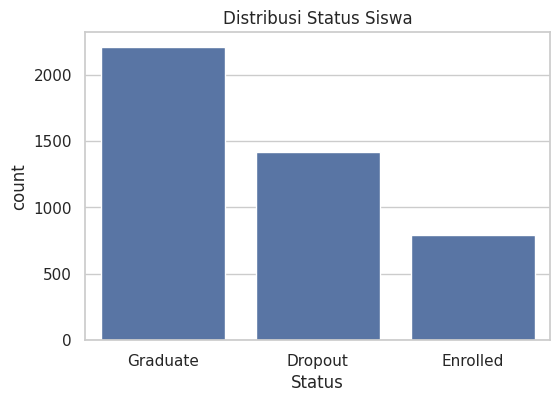

In [9]:
#Distribusi target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Distribusi Status Siswa')
plt.show()

Gambar menampilkan distribusi status mahasiswa dalam dataset:

    Graduate (Lulus): sekitar 2200+ mahasiswa

    Dropout (Putus studi): sekitar 1400+ mahasiswa

    Enrolled (Masih aktif): sekitar 800+ mahasiswa

Artinya:

    Sebagian besar mahasiswa dalam dataset berhasil lulus.

    Jumlah mahasiswa yang dropout juga cukup signifikan.

    Ada sebagian yang masih terdaftar (enrolled) saat data dikumpulkan.

In [10]:
#Korelasi fitur numerik vs `is_dropout`
df['is_dropout'] = (df['Status']=='Dropout').astype(int)
corr = df.select_dtypes(include=['int64','float64']).corr()['is_dropout'].sort_values(ascending=False)
print("Top 10 fitur dengan korelasi tertinggi terhadap is_dropout:")
print(corr.head(10))

Top 10 fitur dengan korelasi tertinggi terhadap is_dropout:
is_dropout                                      1.000000
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Application_mode                                0.198458
Marital_status                                  0.093712
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Name: is_dropout, dtype: float64


Dari hasil korelasi terhadap fitur is_dropout, berikut penjelasan singkat untuk 10 fitur dengan korelasi tertinggi:

    1. is_dropout (1.000)
    Ini adalah variabel target itu sendiri, jadi korelasinya pasti 1.

    2. Age_at_enrollment (0.254)
    Semakin tua usia saat mendaftar, semakin tinggi kemungkinan dropout. Korelasinya cukup kuat secara relatif.

    3. Debtor (0.229)
    Mahasiswa yang memiliki utang kepada institusi lebih berisiko dropout.

    4. Gender (0.204)
    Ada perbedaan tingkat dropout antara gender (kode gender perlu dicek apakah 1 = laki-laki atau perempuan).

    5. Application_mode (0.198)
    Cara mahasiswa mendaftar mungkin berkaitan dengan motivasi atau kesiapan mereka, sehingga memengaruhi dropout.

    6. Marital_status (0.094)
    Status pernikahan juga berkaitan, meskipun tidak terlalu kuat.

    7. Curricular_units_2nd_sem_without_evaluations (0.080)
    Semakin banyak mata kuliah yang tidak diikuti ujian di semester 2, semakin besar kemungkinan dropout.

    8. Mothers_qualification (0.065)
    Tingkat pendidikan ibu sedikit memengaruhi kemungkinan anaknya dropout.

    9. Curricular_units_1st_sem_without_evaluations (0.054)
    Sama seperti semester 2, jika banyak mata kuliah yang tidak diikuti ujian di semester 1, risikonya meningkat.

    10. Previous_qualification (0.049)
    Latar belakang pendidikan sebelumnya punya sedikit pengaruh.

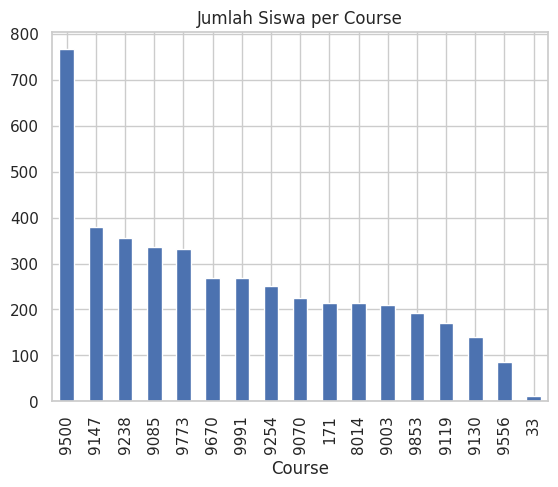

In [11]:
# Contoh analisis kategori: `Course`
df['Course'].value_counts().plot(kind='bar')
plt.title('Jumlah Siswa per Course')
plt.show()

Grafik yang Anda tampilkan menunjukkan distribusi jumlah mahasiswa berdasarkan kode Course (program studi). Berikut beberapa insight dari grafik:

    1. Course dengan kode 9500 memiliki jumlah mahasiswa terbanyak, jauh melampaui yang lain (sekitar 770-an mahasiswa). Ini mungkin merupakan jurusan paling populer.

    2. Setelah itu, Course 9147, 9238, 9085, dan 9773 juga cukup tinggi peminatnya.

    3. Course dengan kode 33 hampir tidak memiliki mahasiswa—mungkin sudah tidak aktif atau hanya ada satu orang.

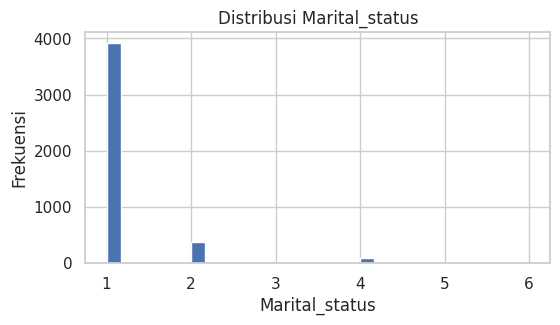

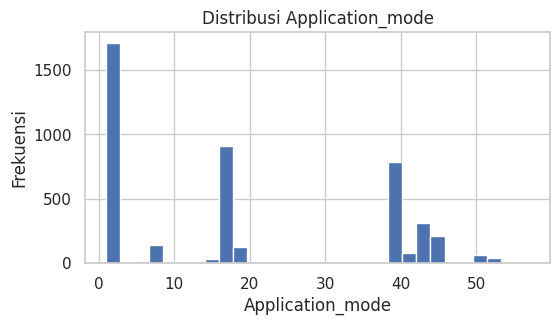

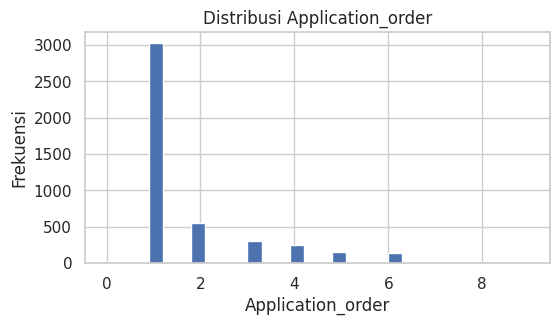

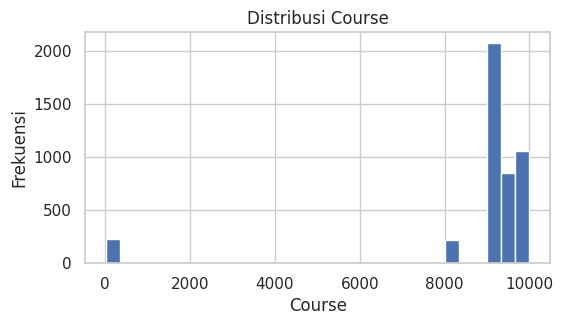

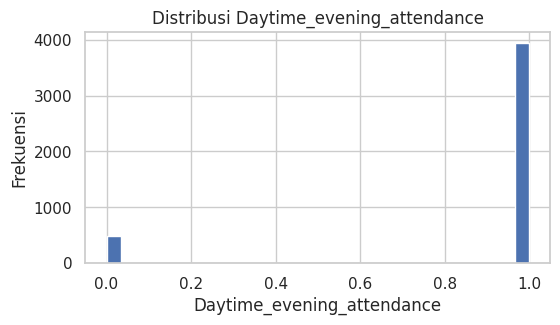

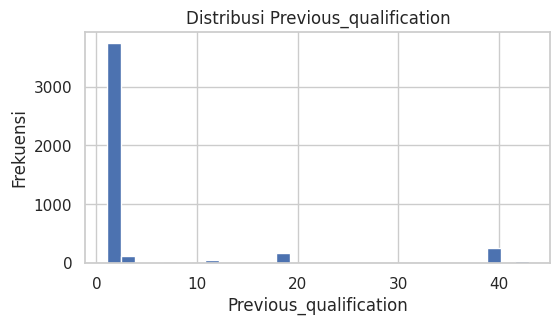

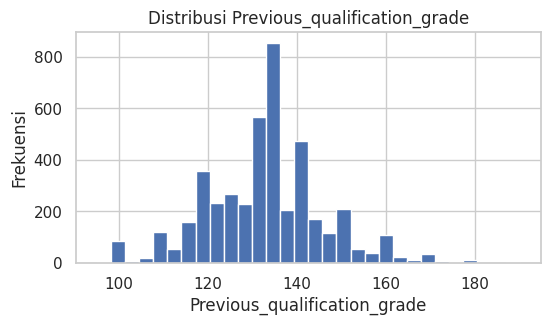

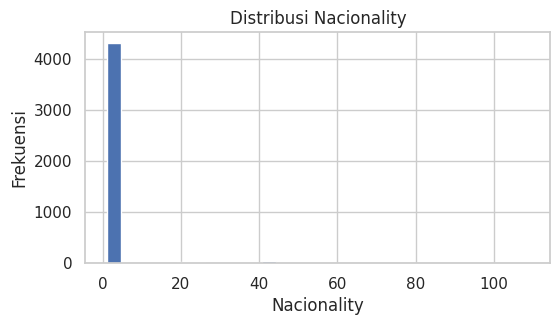

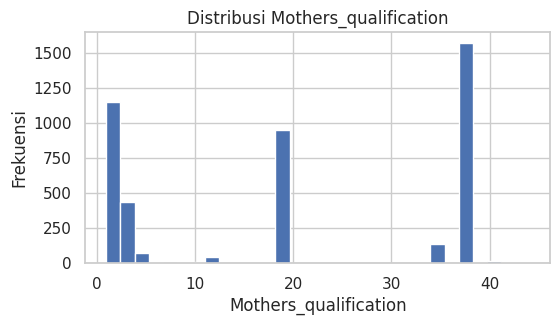

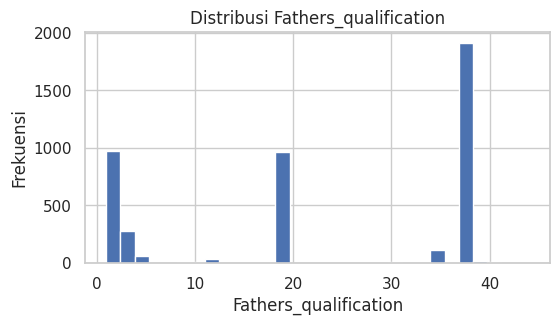

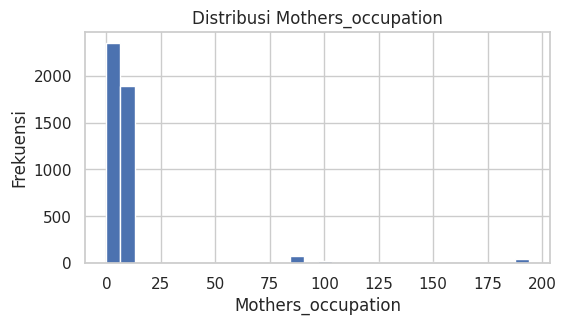

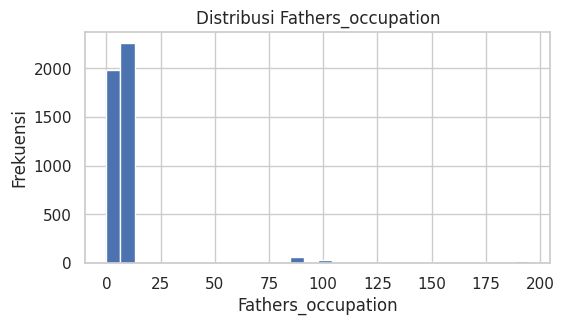

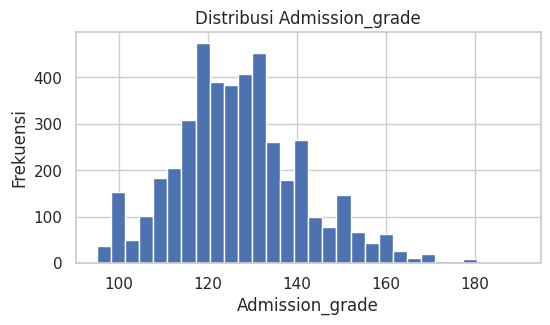

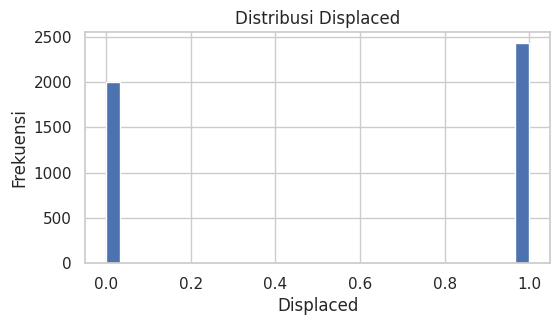

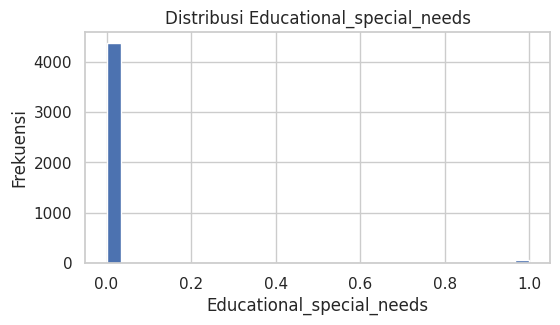

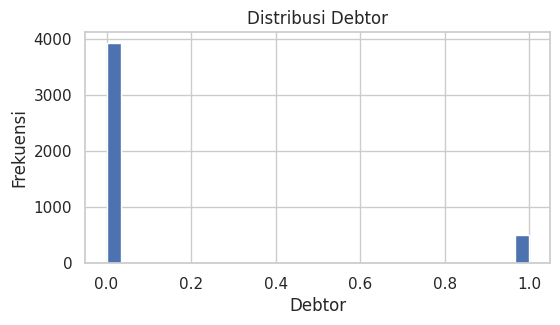

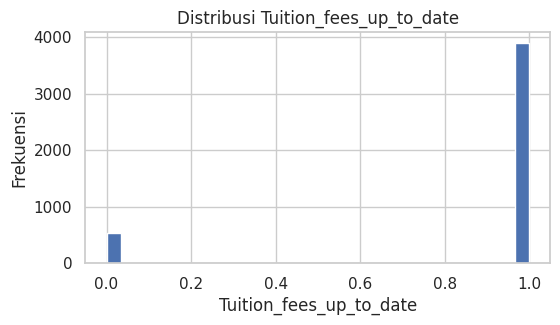

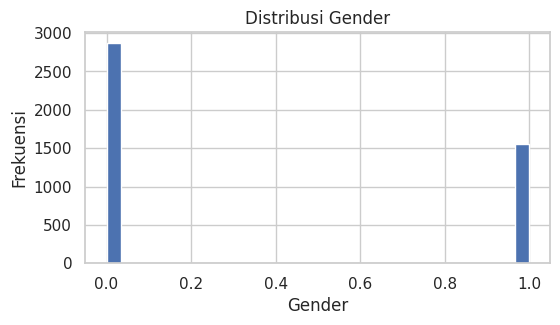

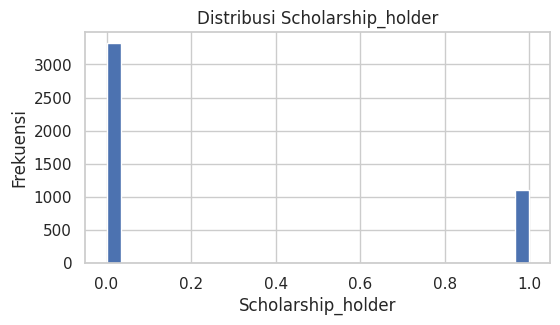

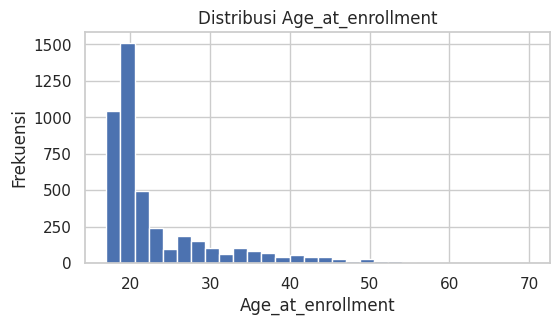

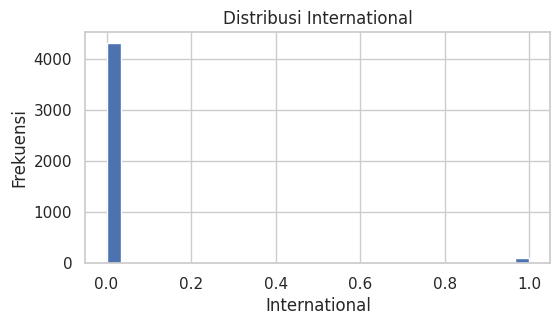

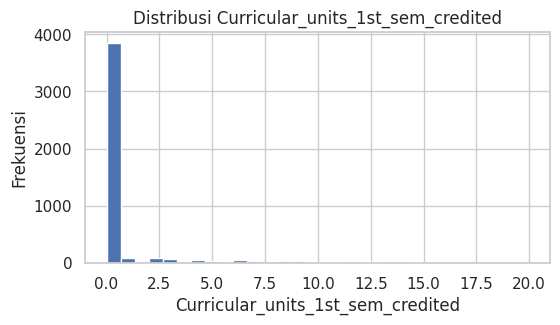

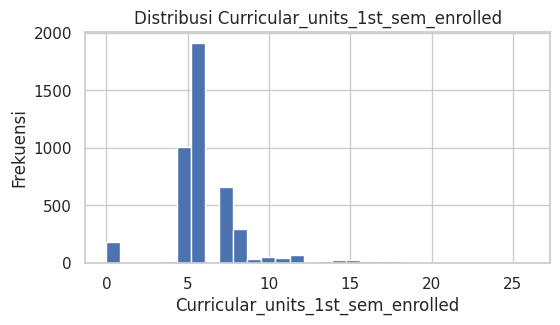

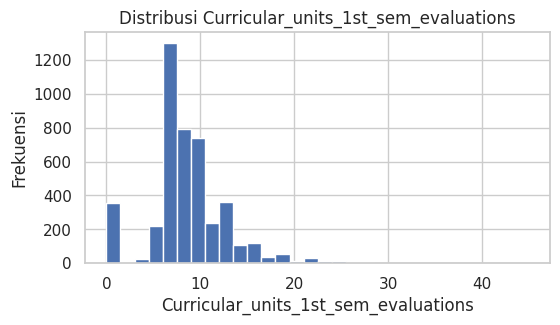

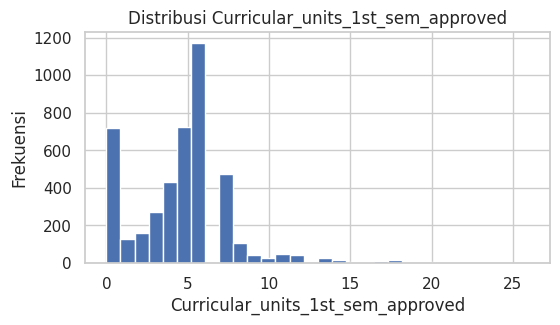

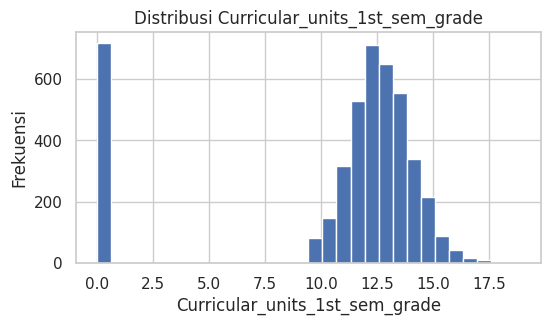

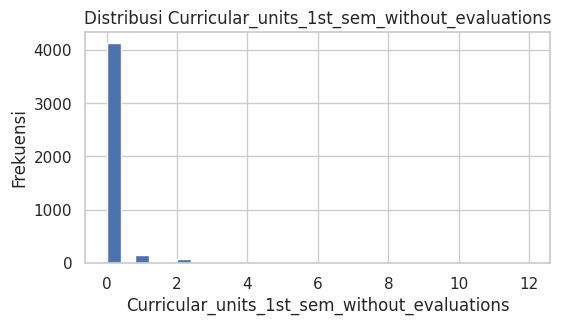

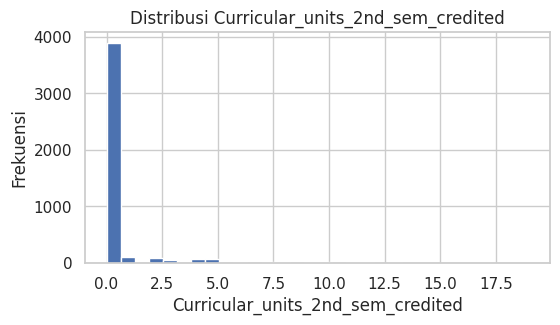

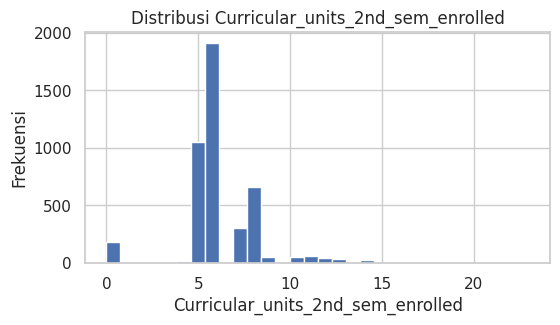

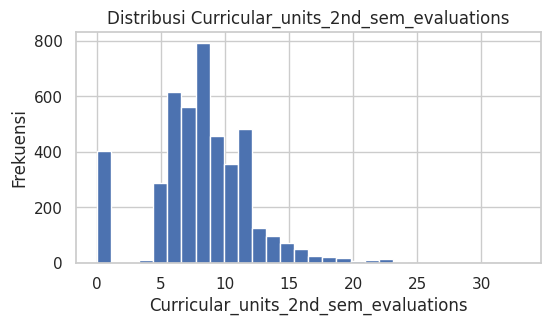

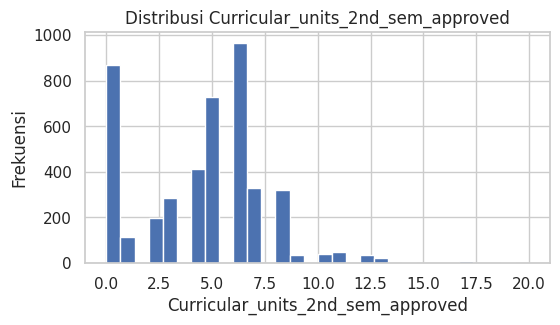

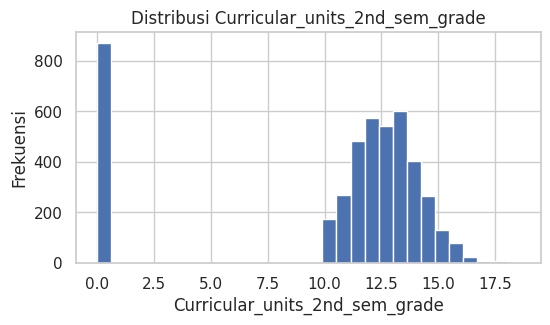

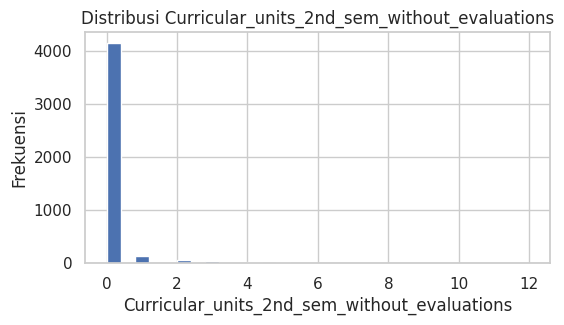

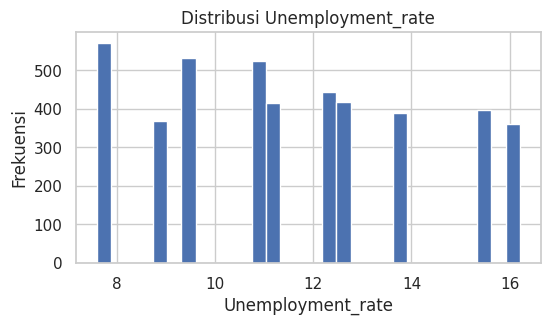

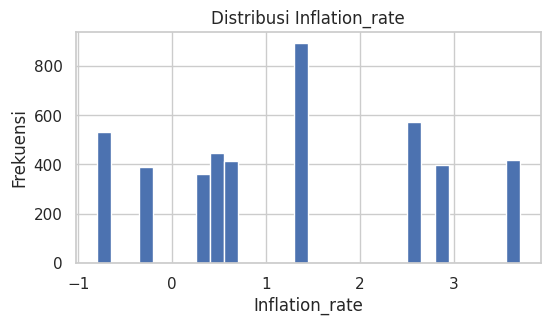

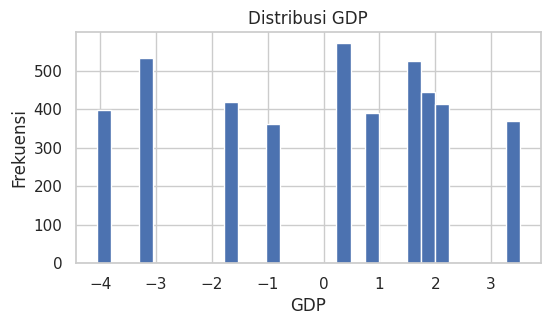

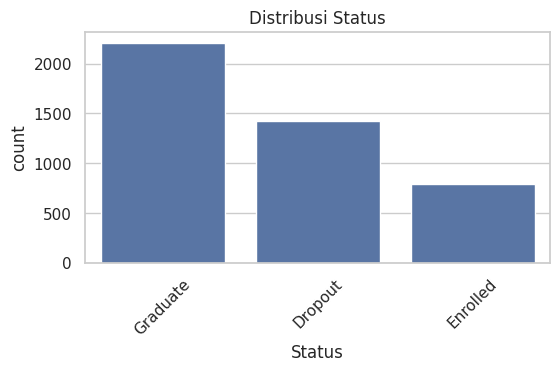

In [12]:
# Univariate numerik
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('is_dropout')
for col in num_cols:
    plt.figure(figsize=(6,3))
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Univariate kategorikal
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

1. **Distribusi Marital_status** =
Mayoritas responden memiliki status pernikahan bernilai 1, yang kemungkinan besar merepresentasikan satu kategori dominan (misalnya, "belum menikah"). Kategori lain sangat sedikit jumlahnya.

2. **Distribusi Application_order** =
Sebagian besar responden mengajukan aplikasi pada urutan pertama (1), dan frekuensinya menurun drastis untuk urutan berikutnya. Artinya, mayoritas mahasiswa diterima di pilihan pertama mereka.

3. **Distribusi Course** =
Ada beberapa kelompok angka besar yang mendominasi (misalnya, mendekati angka 9000-10000), menunjukkan bahwa sebagian besar responden mengambil jenis kursus tertentu (kemungkinan diwakili dengan kode numerik besar), sementara lainnya sangat sedikit.

4. **Distribusi Daytime_evening_attendance** =
Sebagian besar responden memiliki nilai 1, yang kemungkinan berarti mereka mengikuti kuliah pada waktu tertentu (misalnya, malam hari), sedangkan hanya sebagian kecil yang memiliki nilai 0.

5. **Distribusi Previous_qualification** =
Hampir semua responden memiliki nilai 1, menunjukkan jenis kualifikasi sebelumnya yang sama, dengan sedikit variasi pada kategori lain (mungkin kode kualifikasi lain seperti 20, 40, dll.).

6. **Distribusi Previous_qualification_grade** =
Grafik ini menunjukkan distribusi nilai kualifikasi sebelumnya. Nilai berkisar antara sekitar 90 hingga 180, dengan mayoritas nilai berkumpul di kisaran 130–140. Ini menunjukkan bahwa sebagian besar siswa memiliki nilai sebelumnya dalam kisaran tersebut. Distribusi terlihat seperti distribusi normal dengan sedikit skew ke kanan.

7. **Distribusi Nacionality** =
Grafik ini menunjukkan bahwa hampir semua data berasal dari satu kategori nasionalitas (kemungkinan besar satu negara dominan). Hal ini terlihat dari satu batang yang sangat tinggi di posisi indeks sekitar 1–2, sementara kategori lainnya nyaris tidak ada frekuensinya.

8. **Mothers_qualification** =
Mayoritas ibu terkonsentrasi pada jenjang nilai 38, dengan puncak lebih kecil di 1 dan 20, sedangkan kategori lain hampir tidak muncul.

9. **Fathers_qualification** =
Distribusi ayah serupa: nilai 38 mendominasi, disusul nilai 1 dan 20, sementara jenjang lain sangat jarang.

10. **Mothers_occupation** =
Sebagian besar ibu berada di kategori 0–1 (kemungkinan tidak bekerja atau pekerjaan umum), dengan beberapa outlier sangat jarang di angka tinggi.

11. **Distribusi Fathers_occupation** =
menunjukkan bahwa mayoritas nilai kode pekerjaan ayah terpusat di kategori rendah (sekitar 1–10), dengan frekuensi di kisaran 2.000–2.200. Terdapat pula beberapa outlier di kode tinggi (sekitar 80 dan 100), namun jumlahnya sangat kecil (di bawah 50).

12. **Distribusi Admission_grade** =
cenderung membentuk kurva mendekati normal, dengan nilai ujian masuk berkisar antara 90 hingga hampir 180. Titik puncak frekuensi berada di kisaran 120–130, di mana masing‑masing bin mencatat sekitar 350–450 siswa.

13. **Distribusi Displaced** =
memperlihatkan variabel biner: sekitar 2.000 siswa tidak tergolong displaced (0), dan lebih banyak—sekitar 2.400 siswa—tergolong displaced (1).

14. **Distribusi Educational_special_needs** =
juga biner dan menunjukkan bahwa mayoritas besar siswa (lebih dari 4.300) tidak memiliki kebutuhan khusus, sementara hanya sekitar 80–100 siswa yang tercatat berkebutuhan khusus.

15. **Distribusi Debtor** =
memperlihatkan sekitar 3.900 siswa tanpa tunggakan biaya (0), dan sekitar 500 siswa tercatat sebagai debtor (1), menandakan sebagian kecil memiliki tunggakan.

16. **Distribusi Tuition_fees_up_to_date** =
hampir terbalik dengan Debtor: sekitar 3.900 siswa biaya pendidikannya tercatat sudah lunas (1), dan sekitar 500 siswa belum sepenuhnya membayar (0).

17. **Distribusi Gender** =
menggambarkan pembagian dua kategori, di mana satu kelompok (kode 0) berjumlah sekitar 2.800 siswa, sedangkan kelompok lainnya (kode 1) sekitar 1.500 siswa.

18. **Distribusi Age_at_enrollment** =
sangat miring ke kanan: sebagian besar siswa berusia 18–22 tahun, dengan puncak frekuensi di usia 19 (±1.500 siswa) dan 20 (±1.000 siswa). Terdapat ekor panjang hingga usia di atas 40, namun jumlahnya sangat sedikit.

19. **Distribusi Scholarship_holder** =
menandakan bahwa mayoritas siswa (sekitar 3.300) tidak memegang beasiswa (0), sedangkan sekitar 1.100 siswa tercatat sebagai pemegang beasiswa (1).

20. **Age\_at\_enrollment**: Mayoritas mendaftar antara 17–22 tahun, puncak di 18–19.
21. **International**: Hampir seluruhnya domestik (0), sangat sedikit internasional (1).
22. **1st\_sem\_credited**: Sebagian besar 0–1 sks terakreditasi.
23. **1st\_sem\_enrolled**: Umumnya mengambil 5–7 sks, puncak di 6.
24. **1st\_sem\_evaluations**: Biasanya 7–11 evaluasi, puncak di 8–9.
25. **1st\_sem\_approved**: Kebanyakan 5–7 sks disetujui, puncak di 6.
26. **1st\_sem\_grade**: Nilai rata‑rata 10–15, puncak di 12–13.
27. **1st\_sem\_without\_evaluations**: Hampir semua unit dievaluasi (0 tanpa evaluasi).
28. **2nd\_sem\_credited**: Mirip sem 1, kebanyakan 0–1 sks terakreditasi.
29. **2nd\_sem\_enrolled**: Lagi-lagi 5–7 sks diambil, puncak di 6.
30. **2nd\_sem\_evaluations**: Umumnya 5–13 evaluasi, puncak di 7–9.
32. **2nd\_sem\_approved**: Lagi, 5–7 sks disetujui terbanyak.
33. **2nd\_sem\_grade**: Nilai 10–15, puncak di 12–13.
34. **2nd\_sem\_without\_evaluations**: Hampir semua unit ter­evaluasi.
35. **Unemployment\_rate**: Variasi 7–17%, distribusi cukup merata.
36. **Inflation\_rate**: Berkisar –1% sampai >3%, dengan klaster di \~1–2% dan \~3–3,5%.
37. **GDP**: Pertumbuhan –4% hingga \~4%, tersebar tanpa puncak tunggal.









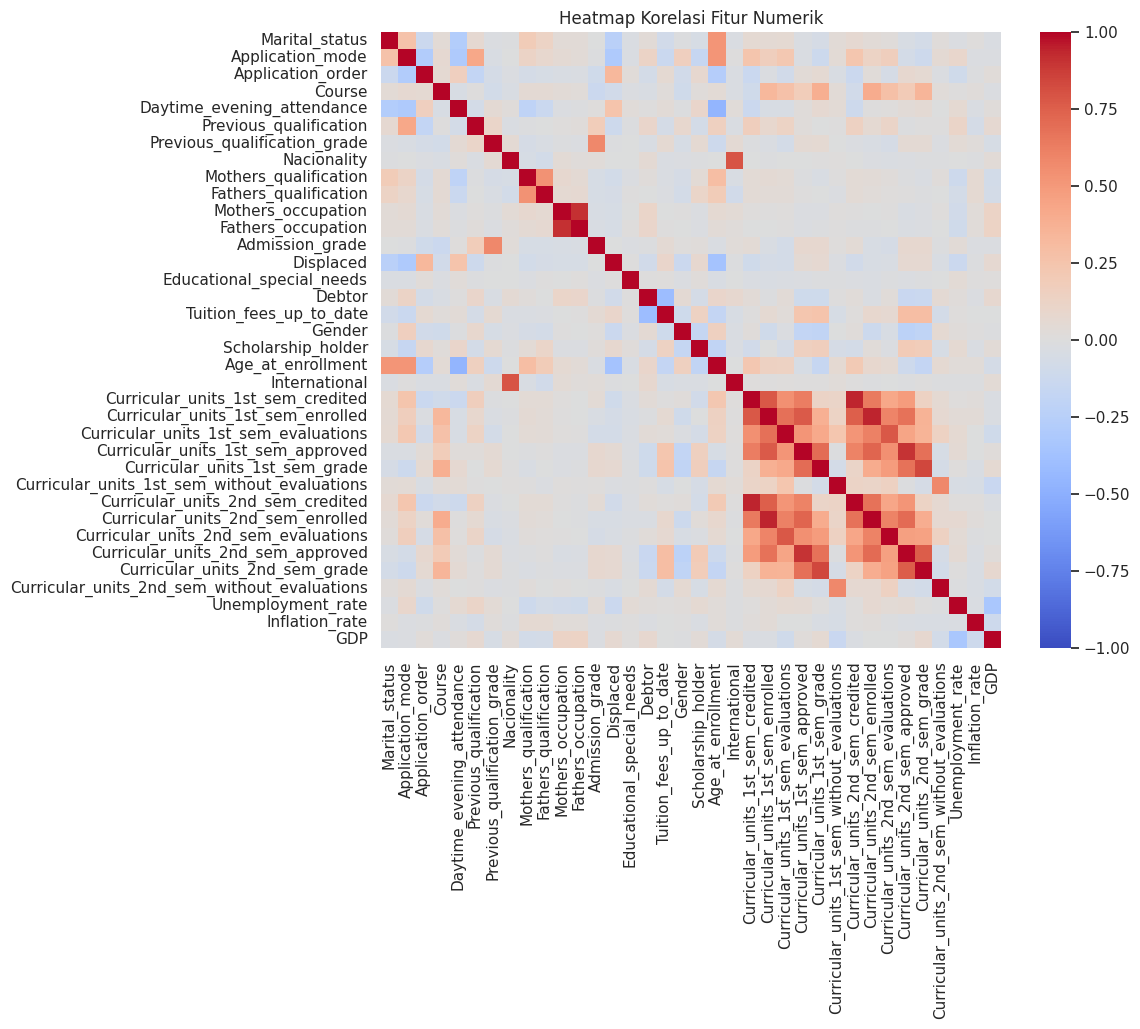

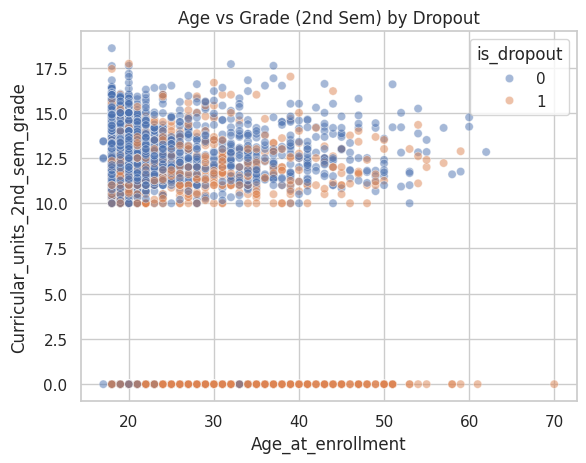

In [13]:
# Korelasi heatmap (numerik)
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# Scatter plot 2 fitur berkorrelasi tinggi vs target
sns.scatterplot(data=df, x='Age_at_enrollment', y='Curricular_units_2nd_sem_grade',
                hue='is_dropout', alpha=0.5)
plt.title('Age vs Grade (2nd Sem) by Dropout')
plt.show()


1. **Heatmap Korelasi Fitur Numerik**

Gambar ini menunjukkan korelasi antar fitur numerik. Fitur akademik seperti nilai dan kredit antar semester saling berkorelasi kuat, sedangkan sebagian besar fitur lain seperti latar belakang keluarga tidak menunjukkan hubungan signifikan.

2. **Age vs Grade (2nd Sem) by Dropout**

Scatter plot ini menunjukkan bahwa mahasiswa dengan nilai semester dua rendah, terutama yang bernilai 0, cenderung dropout. Usia saat mendaftar tidak tampak berpengaruh besar terhadap dropout.

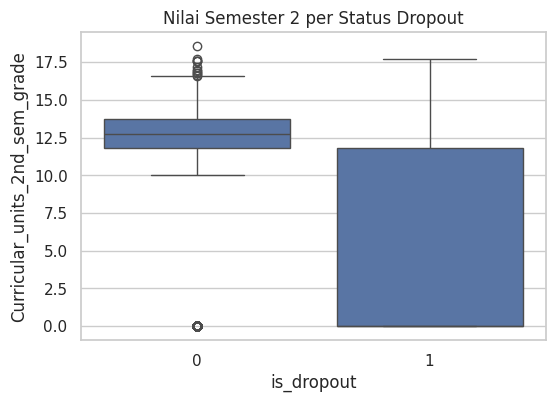

In [14]:
# Boxplot: nilai semester 2 vs is_dropout
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='is_dropout', y='Curricular_units_2nd_sem_grade')
plt.title('Nilai Semester 2 per Status Dropout')
plt.show()


**Nilai Semester 2 per Status Dropout**

Boxplot ini memperlihatkan bahwa mahasiswa yang dropout memiliki nilai semester dua lebih rendah secara umum dibandingkan yang tidak dropout, dengan banyak yang mendapat nilai 0.



In [15]:
# Crosstab: Gender vs Dropout
pd.crosstab(df['Gender'], df['is_dropout'], normalize='index') * 100


is_dropout,0,1
Gender,,
0,74.895397,25.104603
1,54.948586,45.051414


- Gender 0 (kemungkinan laki-laki) memiliki 25,10% dropout dan 74,90% tidak dropout.

- Gender 1 (kemungkinan perempuan) memiliki 45,05% dropout dan 54,95% tidak dropout.

## Data Preparation / Preprocessing

In [16]:
df.drop(columns=['Status'], errors='ignore', inplace=True)


Kolom Status dihapus karena target klasifikasi telah dibinerisasi menjadi kolom baru bernama is_dropout.

In [17]:
# Identifikasi kolom
numeric_cols = df.select_dtypes(include=['int64','float64']).drop('is_dropout', axis=1).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


- numeric_cols: kolom numerik (int/float) selain is_dropout.

- cat_cols: kolom kategorikal (tipe object) yang akan diproses secara terpisah.

In [18]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', cat_transformer, cat_cols)
])

- numeric_transformer: menangani data numerik dengan imputasi (nilai median) dan normalisasi (StandardScaler).

- cat_transformer: menangani data kategorikal dengan imputasi nilai 'Unknown' lalu encoding ke bentuk numerik (OneHotEncoder).

- preprocessor: menggabungkan kedua pipeline di atas dengan ColumnTransformer.

In [20]:
# Siapkan data
y = df['is_dropout']
X = df.drop('is_dropout', axis=1)

- X: semua fitur (drop is_dropout).

- y: target biner dropout (is_dropout).

## Modeling

In [19]:
# Misalnya dataset-mu bernama df
numerical_cols = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'Inflation_rate', 'GDP'
]

categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
    'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_without_evaluations'
]

- numerical_cols: Daftar fitur numerik yang digunakan dalam model.

- categorical_cols: Daftar fitur kategorikal (biasanya bertipe string atau kategori).

In [21]:
# Misalkan df sudah memiliki target 'is_dropout'
y = df['is_dropout']
X = df.drop('is_dropout', axis=1)

# Deteksi kolom numerik & kategorikal
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

- y: Target klasifikasi, yaitu kolom is_dropout.

- X: Semua fitur selain is_dropout.

- Lalu, data dibagi menjadi data latih dan data uji menggunakan train_test_split dengan stratifikasi (agar proporsi dropout seimbang) dan random seed.

In [22]:
#  Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [23]:
# Definisikan model & pipeline
models = {
    'logreg': Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))]),
    'rf': Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(random_state=42))]),
    'xgb': Pipeline([('pre', preprocessor), ('clf', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])
}
params = {
    'logreg': {
        'clf__C': [0.1, 1, 10]
    },
    'rf': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [5, 10, None]
    },
    'xgb': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [3, 6]
    }
}

Tiga model didefinisikan:

    Logistic Regression (logreg)

    Random Forest (rf)

    XGBoost (xgb)

Masing-masing dibungkus dalam pipeline yang mencakup preprocessing (preprocessor) dan model (clf).

In [24]:
# Grid Search pada masing-masing
best_estimators = {}
for name, pipe in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(pipe, params[name], scoring='roc_auc', cv=3)
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f"Best {name} params: {grid.best_params_}")


Tuning logreg...
Best logreg params: {'clf__C': 0.1}
Tuning rf...
Best rf params: {'clf__max_depth': None, 'clf__n_estimators': 200}
Tuning xgb...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best xgb params: {'clf__max_depth': 3, 'clf__n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Untuk masing-masing model, dilakukan tuning hyperparameter menggunakan GridSearchCV dengan skor evaluasi ROC AUC dan 3-fold cross-validation.

Hasil terbaik dari tiap model disimpan di dictionary best_estimators.

In [25]:
import joblib

# Preprocessor otomatis
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler',   StandardScaler())
    ]), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
])

# Gabungkan preprocessor + model
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Fit sekali untuk semuanya
pipeline.fit(X_train, y_train)

# Cek performa (opsional)
print("Train ROC-AUC:", roc_auc_score(y_train, pipeline.predict_proba(X_train)[:,1]))
print("Test  ROC-AUC:", roc_auc_score(y_test,  pipeline.predict_proba(X_test)[:,1]))

# Simpan pipeline ter‐fitted
joblib.dump(pipeline, "pipeline_best.pkl")

Train ROC-AUC: 0.9999999999999999
Test  ROC-AUC: 0.9294661479693469


['pipeline_best.pkl']

- Train ROC-AUC: 0.9999999999999999
Ini berarti model hampir sempurna dalam membedakan antara kelas dropout dan tidak dropout pada data latih. Namun, nilai ini yang sangat mendekati 1 bisa menjadi indikasi overfitting (model terlalu "menghafal" data latih).

- Test ROC-AUC: 0.929
Artinya, model tetap memiliki kinerja sangat baik pada data uji (data yang belum pernah dilihat sebelumnya). Skor ROC-AUC sebesar 0.929 menunjukkan model dapat membedakan siswa dropout dan tidak dropout dengan akurasi yang sangat tinggi.

## Evaluation

In [26]:
#  Pilih model dengan ROC-AUC tertinggi
scores = {name: roc_auc_score(y_test, est.predict_proba(X_test)[:,1]) for name, est in best_estimators.items()}
best_name = max(scores, key=scores.get)
best_model = best_estimators[best_name]
print(f"Best model: {best_name} dengan ROC-AUC {scores[best_name]:.3f}")

Best model: rf dengan ROC-AUC 0.931


✅ Best model: rf
Artinya, dari semua model yang diuji (logistic regression, random forest, XGBoost), random forest memberikan performa klasifikasi terbaik.

📈 ROC-AUC: 0.931
Ini menunjukkan bahwa model memiliki kemampuan sangat baik dalam membedakan siswa yang dropout dan yang tidak dropout. Semakin dekat ke 1, semakin bagus.

In [27]:
# Prediksi & metrik
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.74      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885

ROC AUC: 0.9311944880598064


📊 1. Classification Report

Label 0: Bukan dropout
Label 1: Dropout

    Precision 0: 0.89 → 89% dari prediksi "bukan dropout" benar.

    Recall 0: 0.95 → 95% dari siswa yang benar-benar tidak dropout terdeteksi dengan benar.

    F1-score 0: 0.92 → Kombinasi presisi dan recall sangat baik untuk kelas non-dropout.

    Precision 1: 0.87 → 87% dari prediksi "dropout" benar.

    Recall 1: 0.74 → 74% dari siswa yang benar-benar dropout berhasil terdeteksi.

    F1-score 1: 0.80 → Masih cukup baik, meskipun recall sedikit lebih rendah dari precision.

    Accuracy: 88% → Model secara keseluruhan memprediksi dengan benar sebanyak 88% dari semua data uji.

    Macro avg: Rata-rata presisi, recall, dan f1-score antar kelas (tanpa mempertimbangkan proporsi data).

    Weighted avg: Rata-rata tertimbang berdasarkan jumlah sampel per kelas.

📈 2. ROC AUC: 0.931
Ini sangat bagus. Menunjukkan model punya kemampuan yang kuat dalam membedakan dua kelas (dropout dan tidak dropout).

📌 Kesimpulan:

    Model bekerja sangat baik, terutama dalam mendeteksi siswa yang tidak dropout.

    Kinerja untuk mendeteksi dropout juga baik, tapi masih bisa ditingkatkan — misalnya dengan menyeimbangkan data (karena dropout jauh lebih sedikit jumlahnya).

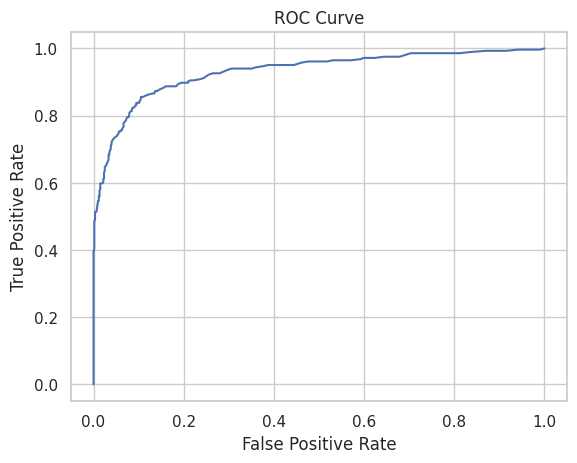

In [28]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Menunjukkan ROC curve yang memvisualisasikan performa model klasifikasi.

- Sumbu X: False Positive Rate (FPR)

- Sumbu Y: True Positive Rate (TPR)

- Kurva mendekati sudut kiri atas, yang menunjukkan model memiliki performa yang baik.

- Semakin luas area di bawah kurva (AUC), semakin baik performa model dalam membedakan kelas.

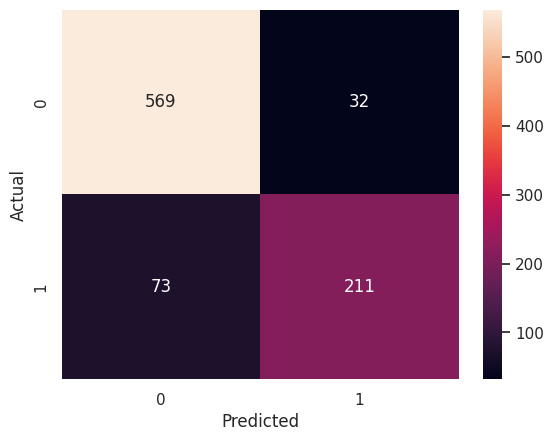

In [29]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion matrix dari hasil prediksi model:

- True Negative (TN): 569 — Negatif yang diprediksi benar

- False Positive (FP): 32 — Positif yang diprediksi salah

- False Negative (FN): 73 — Negatif yang diprediksi salah

- True Positive (TP): 211 — Positif yang diprediksi benar

Model cukup baik karena jumlah TP dan TN jauh lebih tinggi dibandingkan FP dan FN.

In [30]:
# Simpan data akhir ke CSV
df.to_csv("data_final.csv", index=False)

# Unduh ke lokal
from google.colab import files
files.download("data_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import pandas as pd
import sqlite3

# Load data dari file CSV
df = pd.read_csv("data_final.csv")

# Simpan database SQLite di direktori kerja saat ini
sqlite_path = "students_data.db"
conn = sqlite3.connect(sqlite_path)

# Tulis data ke tabel bernama 'students'
df.to_sql("students", conn, if_exists="replace", index=False)

conn.close()
print(f"Database SQLite berhasil disimpan ke: {sqlite_path}")


Database SQLite berhasil disimpan ke: students_data.db


In [32]:
import pandas as pd
import sqlite3

# Load data final
df = pd.read_csv("data_final.csv")

# Buat koneksi ke database SQLite
conn = sqlite3.connect("students_data.db")

# Simpan ke tabel bernama 'students'
df.to_sql("students", conn, if_exists="replace", index=False)

# Tutup koneksi
conn.close()


In [33]:
for name, model in best_estimators.items():
    print(f"\nEvaluasi model: {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Evaluasi model: logreg
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.90      0.72      0.80       284

    accuracy                           0.88       885
   macro avg       0.89      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885


Evaluasi model: rf
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.74      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885


Evaluasi model: xgb
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.76      0.81       284

    accuracy                           0.89       885
   macro avg       0.88      0.85      0.87       885
weighted 

🔍 1. Akurasi
- logreg: 88%
- rf: 88%
- xgb: 89% → tertinggi

📊 2. Precision (kelas 1 / positif)
- logreg: 0.90
- rf: 0.87
- xgb: 0.87
→ Logreg unggul dalam menghindari false positive.

🎯 3. Recall (kelas 1 / positif)
- logreg: 0.72
- rf: 0.74
- xgb: 0.76 → terbaik dalam menangkap semua kasus positif.

⚖️ 4. F1-score (kelas 1 / positif)
- logreg: 0.80
- rf: 0.80
- xgb: 0.81 → seimbang antara precision dan recall.

📚 Kesimpulan:
XGBoost (xgb) menunjukkan performa keseluruhan terbaik, terutama karena akurasi tertinggi dan F1-score yang paling baik.

Jika menghindari false positives sangat penting, logreg bisa dipertimbangkan karena precision-nya tertinggi.

Jika menangkap semua kasus positif (recall) lebih penting, xgb lebih unggul.-

In [34]:
!pip freeze > requirements.txt